
### Directorio de trabajo



In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


*   Librerías utilizadas

In [ ]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached statsmodels-0.13.5-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (9.9 MB)
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.13.0
    Uninstalling statsmodels-0.13.0:
      Successfully uninstalled statsmodels-0.13.0


In [ ]:
!pip install statsmodels==0.13.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached statsmodels-0.13.0-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (9.8 MB)
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.13.5
    Uninstalling statsmodels-0.13.5:
      Successfully uninstalled statsmodels-0.13.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pmdarima 2.0.2 requires statsmodels>=0.13.2, but you have statsmodels 0.13.0 which is incompatible.


In [ ]:
# Tratamiento de datos
# ================================================================================
import pandas as pd
import numpy as np

# Gráficos
# ================================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ================================================================================
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression  # solo uso esta en la reg lineal
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf

# Configuración para las series
# ================================================================================
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import pacf
import statsmodels.api as sm

import scipy as sp
import scipy.stats
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.arima.model import ARIMA
from scipy import stats # prueba normalidad en residuos
from pmdarima.arima import auto_arima

# Configuración para machine learning
# ================================================================================
import tensorflow as tf
import tensorflow.keras as keras
from pandas.core.frame import DataFrame
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.inspection import permutation_importance
import multiprocessing

# Configuración matplotlib
# ================================================================================
plt.rcParams['figure.figsize'] = 17, 8 # Dimensiones de los gráficos
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ================================================================================
import warnings
warnings.filterwarnings('ignore')

# Configuración No sé pero ahí estaba
# ================================================================================
from pandas.plotting import register_matplotlib_converters

## **Importación de datos**

La serie contiene información sobre el precio de apertura de las acciones de Ecopetrol desde el primero de enero de 2018 hasta el 7 de septiembre del 2022. La serie es irregular, puesto que al ser acciones de la bolsa de valores, no se cuenta con valores para los fines de semana, o días festivos.

In [ ]:
Ecopetrol = pd.read_excel('/content/drive/Shareddrives/Series/Datos históricos ECO.xlsx', header=0)
Ecop = Ecopetrol[['Fecha','Apertura']]
print(Ecop)
Ecop.tail

<bound method NDFrame.tail of           Fecha  Apertura      BC_Eco
0    2018-01-02      2200  331.145227
1    2018-01-03      2270  338.623722
2    2018-01-04      2350  347.089183
3    2018-01-05      2460  358.594100
4    2018-01-09      2500  362.740495
...         ...       ...         ...
1137 2022-09-01      2250  336.493920
1138 2022-09-02      2244  335.853911
1139 2022-09-05      2306  342.443709
1140 2022-09-06      2350  347.089183
1141 2022-09-07      2284  340.111345

[1142 rows x 3 columns]>

Fecha
2018-01-02    2200
2018-01-03    2270
2018-01-04    2350
2018-01-05    2460
2018-01-09    2500
              ... 
2022-09-01    2250
2022-09-02    2244
2022-09-05    2306
2022-09-06    2350
2022-09-07    2284
Name: Apertura, Length: 1142, dtype: int64


Text(0.5, 1.0, 'Precio de apertura de Ecopetrol en la bolsa de valores de Colombia')

Text(0, 0.5, 'COP')

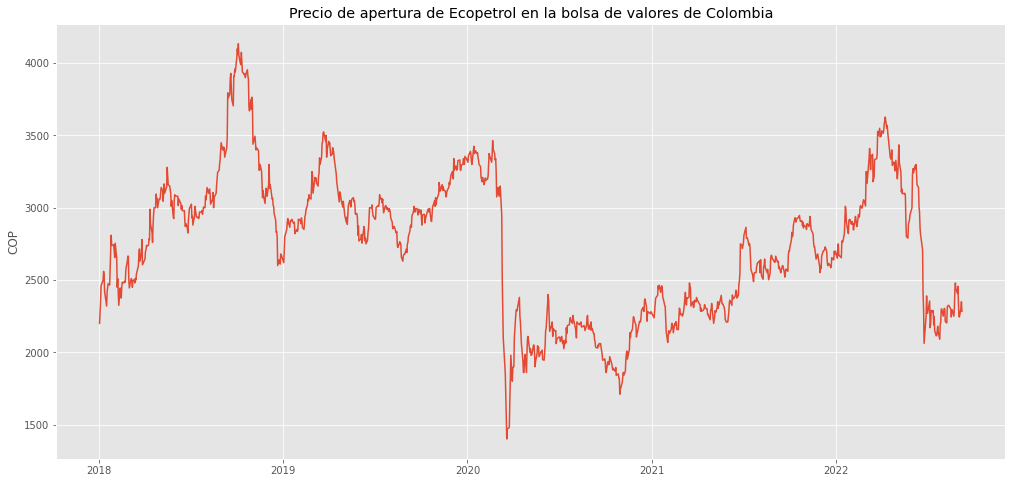

In [ ]:
#Ecop['Fecha']=pd.to_datetime(Ecop['Fecha'], freq='B') # pasar a formato fecha
Valores_Ecop=Ecop.set_index('Fecha') # nuevo dataframe indexado por la fecha
#Valores_Ecop.dropna(axis =0, inplace=True )
Eco_ts=Valores_Ecop['Apertura'] # vector Eco los valores de la serie
print(Eco_ts)

plt.plot(Eco_ts)
plt.title('Precio de apertura de Ecopetrol en la bolsa de valores de Colombia')
plt.ylabel('COP')
plt.show()

# Transformación de Box-Cox

In [ ]:
## Asignación de la frecuencia mensual
#Valores_Ecop.index.freq='MS'
#Eco_ts.index.freq='MS'#ts.index

Text(0.5, 1.0, 'Serie Eco Tranformación Box-Cox (lambda=0.71)')

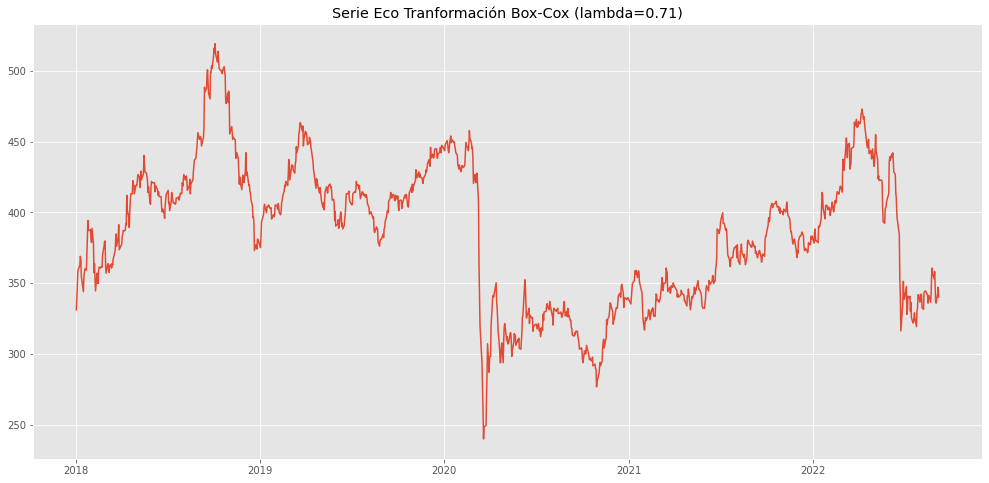

In [ ]:
rEco=sp.stats.boxcox(Ecop['Apertura'],lmbda=0.71)
Ecop = Ecop.assign(BC_Eco=rEco) # al dataframe original le añadimos los valores de la transformación

rValor=Ecop.set_index('Fecha')  # Otro dataframe Eco el índice de la fecha
rEcoV= rValor['BC_Eco'] # la serie de la transformación guardada en el dataframe anterior
plt.plot(rEcoV)
plt.title('Serie Eco Tranformación Box-Cox (lambda=0.71)')
plt.show()

Al realizar la prueba de raíz unitaria se obtiene un p-valor del 0.51, esto quiere decir que no rechazamos la hipótesis nula, por lo cual si existe una raíz unitaria y se procede a diferenciar la serie.

In [ ]:
from statsmodels.tsa.stattools import adfuller
resultadoadf=adfuller(rEcoV,regression="nc") ####maxlag es importante
##Se debe elegir un lagmax grande y ver si el valor t de el último coeficiente de la variable
###Diferenciada es significativo(>1.6 en valor absoluto), si así lo es se lleva a cabo el test de Dickey Fuller
###Si no lo es, hay que reducir el rezago.
print('ADF Statistic: %f' % resultadoadf[0])
print('P-value: %f' % resultadoadf[1])
for key, value in resultadoadf[4].items():
    print('\t%s: %.3f' % (key, value))

adfstat, pvalue, critvalues, resstore=adfuller(rEcoV,regression="nc",maxlag=3,store=True,regresults=True)####maxlag es importante
resstore.resols.summary()
pvalue

###Al no rechazarse la hipótesis nula implica que existe raíz unitaria.

ADF Statistic: -0.446757
P-value: 0.517871
	1%: -2.568
	5%: -1.941
	10%: -1.617


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.022
Model:                            OLS   Adj. R-squared (uncentered):              0.018
Method:                 Least Squares   F-statistic:                              6.361
Date:                Wed, 30 Nov 2022   Prob (F-statistic):                    4.62e-05
Time:                        19:52:40   Log-Likelihood:                         -3693.0
No. Observations:                1138   AIC:                                      7394.
Df Residuals:                    1134   BIC:                                      7414.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0002      0.000     -0.421      0.674      -0.001       0.001
x2             0.1156      0.030      3.910      0.000       0.058       0.174
x3             0.0096      0.030      0.324      0.746      -0.049       0.068
x4             0.0844      0.030      2.857      0.004       0.026       0.142
==============================================================================
Omnibus:                      130.039   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              728.359
Skew:                          -0.355   Prob(JB):                    6.90e-159
Kurtosis:                       6.854   Cond. No.                         67.4
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

0.5282212723680193

# Eliminación de la tendencia por medio de diferenciación

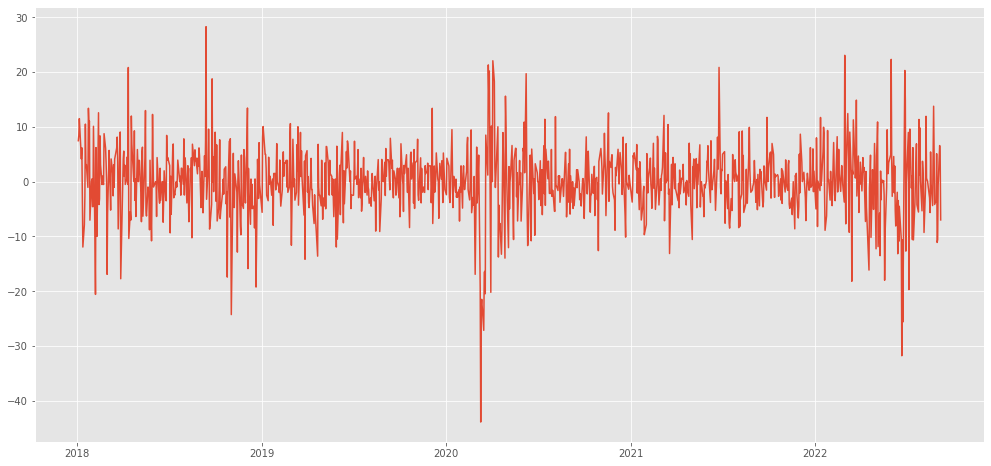

In [ ]:
diff=rEcoV.diff(periods=1)[1:]
plt.plot(diff)

In [ ]:
diff

Fecha
2018-01-03     7.478495
2018-01-04     8.465461
2018-01-05    11.504917
2018-01-09     4.146396
2018-01-10     6.183724
                ...    
2022-09-01   -10.595263
2022-09-02    -0.640009
2022-09-05     6.589798
2022-09-06     4.645474
2022-09-07    -6.977838
Name: BC_Eco, Length: 1141, dtype: float64

# Machine learning

## Redes Multicapa (MLP)

Para empezar este modelo, el cual se aplicará sobre la serie original sin ninguna transformación, observamos el acf para determinar la cantidad de retardos que se tendrán presentes como covariables. Se considerarán dos retardos, puesto que el tercero ya se puede considerar como cero y el cuarto no se aleja lo suficiente de las bandas

### ACF

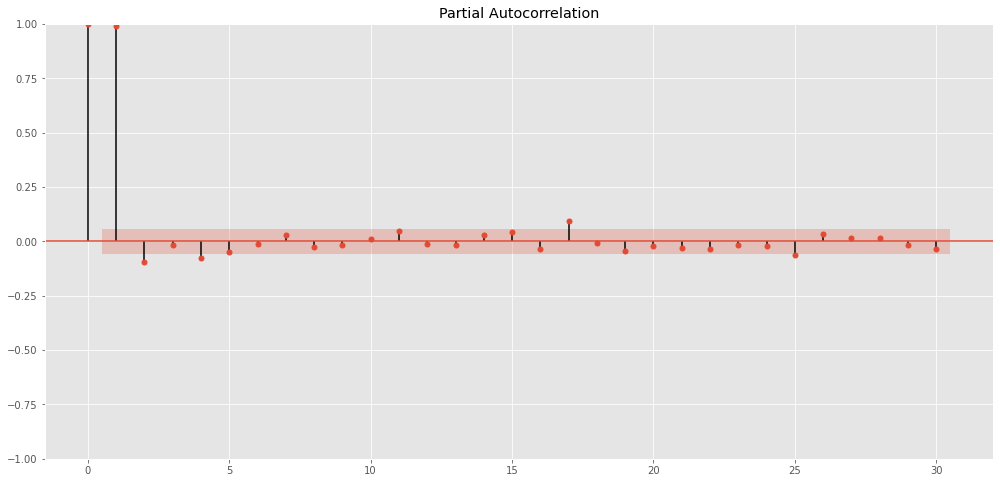

In [ ]:
pacf_diff=plot_pacf(Eco_ts,lags=30,method='ldbiased')

### Creación de variables rezagadas

In [ ]:
#índice de intervención
Valores_Ecop[534:550]
len(Valores_Ecop[0:535])
len(Valores_Ecop)

1142

In [ ]:
from pandas import DataFrame

SerieOri=pd.DataFrame(Valores_Ecop['Apertura'])
dfEco=DataFrame()

for i in range(2,0,-1):
    dfEco[['t-'+str(i)]] = SerieOri.shift(i)

#cero=np.zeros(535)
#uno=np.ones(607)
#inter = np.concatenate((cero,uno))
#len(inter)

#dfEco['Intervencion']= inter
#dfRetail['Year cos']= Retail['Year cos']

dfEco['t'] = SerieOri.values

dfEco

,t-2,t-1,t
Fecha,,,
2018-01-02,NaN,NaN,2200
2018-01-03,NaN,2200.0,2270
2018-01-04,2200.0,2270.0,2350
2018-01-05,2270.0,2350.0,2460
2018-01-09,2350.0,2460.0,2500
...,...,...,...
2022-09-01,2456.0,2350.0,2250
2022-09-02,2350.0,2250.0,2244
2022-09-05,2250.0,2244.0,2306


Definimos aquí las covariables y rezagos a tener en cuenta.

In [ ]:
dfEco_corta = dfEco[2:]
print(dfEco_corta.head(15))
dfEco_corta.shape

CortasplitEco = dfEco_corta.values
XEco = CortasplitEco[:, 0:-1]
yEco = CortasplitEco[:,-1]

               t-2     t-1     t
Fecha                           
2018-01-04  2200.0  2270.0  2350
2018-01-05  2270.0  2350.0  2460
2018-01-09  2350.0  2460.0  2500
2018-01-10  2460.0  2500.0  2560
2018-01-11  2500.0  2560.0  2535
2018-01-12  2560.0  2535.0  2420
2018-01-15  2535.0  2420.0  2345
2018-01-16  2420.0  2345.0  2320
2018-01-17  2345.0  2320.0  2420
2018-01-18  2320.0  2420.0  2445
2018-01-19  2420.0  2445.0  2475
2018-01-22  2445.0  2475.0  2465
2018-01-23  2475.0  2465.0  2595
2018-01-24  2465.0  2595.0  2700
2018-01-25  2595.0  2700.0  2810


(1140, 3)

Asignamos los datos de entrenamiento, validación y prueba en los mismos límites Ecosiderados para el modelo SARIMA

###Separacion(Entrenamiento-Validación-Prueba) y Normalización.

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

retar = 2
n = len(Valores_Ecop['Apertura'])
XEco_train=XEco[0:(int(n*0.7)-retar)]
XEco_val=XEco[(int(n*0.7)-retar):(int(n*0.9)-retar)]
XEco_test=XEco[(int(n*0.9)-retar):]
XEco_train_full=XEco[0:(int(n*0.9)-retar)]

yEco_train=yEco[0:(int(n*0.7)-retar)]
yEco_val=yEco[(int(n*0.7)-retar):(int(n*0.9)-retar)]
yEco_test=yEco[(int(n*0.9)-retar):]
yEco_train_full=yEco[0:(int(n*0.9)-retar)]

scaler=StandardScaler()
XEco_train=scaler.fit_transform(XEco_train)
XEco_val=scaler.transform(XEco_val)
XEco_test=scaler.transform(XEco_test)
XEco_train_full=scaler.transform(XEco_train_full)

print('Observations for feature: %d' % (len(Eco_ts)))
print('Training Observations for feature: %d' % (len(XEco_train)))
print('Validation Observations for feature: %d' % (len(XEco_val)))
print('Testing Observations for feature: %d' % (len(XEco_test)))

#XEco_train[528:535]
#XEco_train_full[528:535]

Observations for feature: 1142
Training Observations for feature: 797
Validation Observations for feature: 228
Testing Observations for feature: 115


In [ ]:
tf.random.set_seed(1)
#Intento 4: MSE=4058
#input_layer = keras.layers.Input(shape=XEco_train.shape[1:])
#hidden1 = keras.layers.Dense(256,activation="relu")(input_layer)
#hidden2 = keras.layers.Dense(64,activation="relu")(hidden1)
#output_layer = keras.layers.Dense(1, activation='relu')(hidden2)

#Intento5: MSE= 3244
input_layer = keras.layers.Input(shape=XEco_train.shape[1:])
hidden1 = keras.layers.Dense(512,activation="relu")(input_layer)
hidden2 = keras.layers.Dense(64,activation="relu")(hidden1)
output_layer = keras.layers.Dense(1, activation='relu')(hidden2)

#Intento 6: MSE=3577
#input_layer = keras.layers.Input(shape=XEco_train.shape[1:])
#hidden1 = keras.layers.Dense(512,activation="relu")(input_layer)
#hidden2 = keras.layers.Dense(128,activation="relu")(hidden1)
#output_layer = keras.layers.Dense(1, activation='relu')(hidden2)

#Intento 1: MSE=3877
#input_layer = keras.layers.Input(shape=XEco_train.shape[1:])
#hidden1 = keras.layers.Dense(512,activation="relu")(input_layer)
#hidden2 = keras.layers.Dense(256,activation="relu")(hidden1)
#output_layer = keras.layers.Dense(1, activation='relu')(hidden2)

#Intento 2: MSE=4893
#input_layer = keras.layers.Input(shape=XEco_train.shape[1:])
#hidden1 = keras.layers.Dense(512,activation="relu")(input_layer)
#hidden2 = keras.layers.Dense(512,activation="relu")(hidden1)
#output_layer = keras.layers.Dense(1, activation='relu')(hidden2)

#Intento 3: MSE=3291
#input_layer = keras.layers.Input(shape=XEco_train.shape[1:])
#hidden1 = keras.layers.Dense(512,activation="relu")(input_layer)
#hidden2 = keras.layers.Dense(64,activation="relu")(hidden1)
#hidden3 = keras.layers.Dense(16,activation="relu")(hidden2)
#output_layer = keras.layers.Dense(1, activation='relu')(hidden3)


ts_model=keras.Model(inputs=[input_layer],outputs=[output_layer])
ts_model.summary()
ts_model.compile(loss="mean_squared_error",optimizer="adam")
history=ts_model.fit(XEco_train,yEco_train,epochs=50,batch_size=30,validation_data=(XEco_val,yEco_val))

Model: "model_97"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_100 (InputLayer)      [(None, 3)]               0         
                                                                 
 dense_416 (Dense)           (None, 512)               2048      
                                                                 
 dense_417 (Dense)           (None, 64)                32832     
                                                                 
 dense_418 (Dense)           (None, 1)                 65        
                                                                 
Total params: 34,945
Trainable params: 34,945
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
27/27 [==============================] - 1s 8ms/step - loss: 7839342.0000 - val_loss: 7219929.5000
Epoch 2/50
27/27 [==============================] - 0s 4ms/step - loss: 7789

In [ ]:
mse_test=ts_model.evaluate(XEco_val,yEco_val)

8/8 [==============================] - 0s 2ms/step - loss: 3244.3862


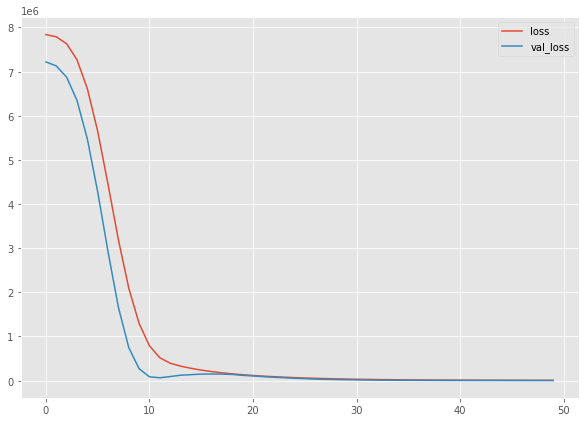

In [ ]:
pd.DataFrame(history.history).plot(figsize=(10,7))

In [ ]:
ypred=ts_model.predict(XEco_val)
print(ypred)
len(ypred)

8/8 [==============================] - 0s 2ms/step
[[2272.297 ]
 [2292.428 ]
 [2289.2996]
 [2277.4368]
 [2273.9705]
 [2249.3123]
 [2239.7996]
 [2233.1052]
 [2214.8845]
 [2247.8948]
 [2265.0388]
 [2294.53  ]
 [2284.0674]
 [2212.8928]
 [2201.7092]
 [2222.655 ]
 [2252.5176]
 [2255.737 ]
 [2273.1514]
 [2308.3054]
 [2291.506 ]
 [2297.093 ]
 [2303.0664]
 [2343.0415]
 [2334.577 ]
 [2310.93  ]
 [2306.304 ]
 [2290.1526]
 [2267.257 ]
 [2224.2048]
 [2205.305 ]
 [2197.406 ]
 [2195.138 ]
 [2216.3088]
 [2245.4207]
 [2292.304 ]
 [2324.68  ]
 [2307.848 ]
 [2342.755 ]
 [2357.6414]
 [2344.555 ]
 [2353.2488]
 [2385.93  ]
 [2397.1038]
 [2361.1365]
 [2357.4924]
 [2417.3113]
 [2460.6638]
 [2504.1301]
 [2665.406 ]
 [2732.0493]
 [2713.1162]
 [2720.558 ]
 [2742.406 ]
 [2784.4565]
 [2840.7673]
 [2807.518 ]
 [2781.6206]
 [2780.944 ]
 [2746.0544]
 [2737.5242]
 [2724.7583]
 [2663.4778]
 [2578.6628]
 [2527.9358]
 [2481.5964]
 [2496.7559]
 [2523.756 ]
 [2528.7837]
 [2555.981 ]
 [2581.8416]
 [2597.0125]
 [2602.3782]


228

<Figure size 1080x504 with 0 Axes>

Text(0.5, 1.0, 'Actual vs Predicted Ecopetrol')

Text(0, 0.5, 'Micras')

Text(0.5, 0, 'Index')

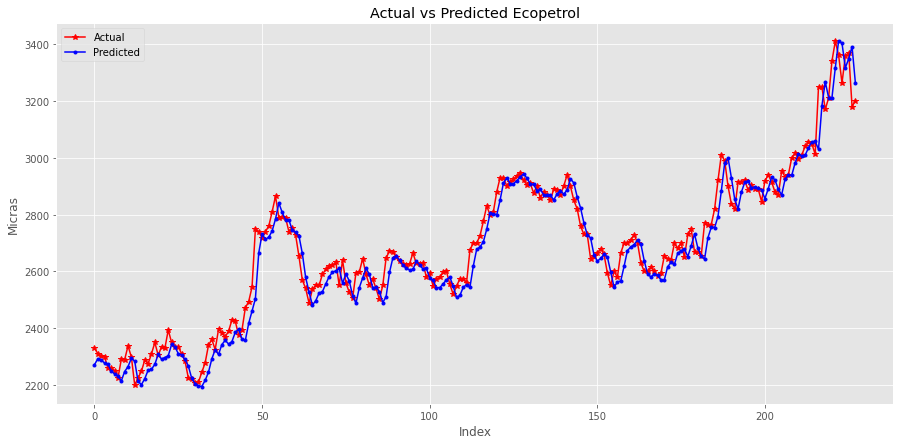

In [ ]:
plt.figure(figsize=(15, 7))
plt.plot(range(yEco_val.size), yEco_val, linestyle='-', marker='*', color='r')
plt.plot(range(ypred.size), ypred, linestyle='-', marker='.', color='b')
plt.legend(['Actual','Predicted'], loc=2)
plt.title('Actual vs Predicted Ecopetrol')
plt.ylabel('Micras')
plt.xlabel('Index')

### Reajuste final

In [ ]:
tf.random.set_seed(1)
input_layer = keras.layers.Input(shape=XEco_train_full.shape[1:])
hidden1 = keras.layers.Dense(512,activation="relu")(input_layer)
hidden2 = keras.layers.Dense(64,activation="relu")(hidden1)
output_layer = keras.layers.Dense(1, activation='relu')(hidden2)

ts_model_full=keras.Model(inputs=[input_layer],outputs=[output_layer])
ts_model_full.summary()
ts_model_full.compile(loss="mean_squared_error",optimizer="adam")
history=ts_model_full.fit(XEco_train_full,yEco_train_full,epochs=50,batch_size=30,validation_data=(XEco_test,yEco_test))

Model: "model_101"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_105 (InputLayer)      [(None, 3)]               0         
                                                                 
 dense_430 (Dense)           (None, 512)               2048      
                                                                 
 dense_431 (Dense)           (None, 64)                32832     
                                                                 
 dense_432 (Dense)           (None, 1)                 65        
                                                                 
Total params: 34,945
Trainable params: 34,945
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
35/35 [==============================] - 1s 7ms/step - loss: 7699892.0000 - val_loss: 8082189.5000
Epoch 2/50
35/35 [==============================] - 0s 3ms/step - loss: 759

In [ ]:
mse_test=ts_model_full.evaluate(XEco_test,yEco_test)

4/4 [==============================] - 0s 3ms/step - loss: 8487.0811


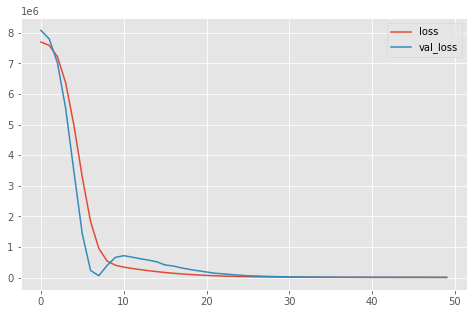

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))

In [ ]:
ypred=ts_model.predict(XEco_test)
print(ypred)
len(ypred)

4/4 [==============================] - 0s 3ms/step
[[3208.1726]
 [3225.575 ]
 [3313.0999]
 [3360.8123]
 [3384.3132]
 [3505.5916]
 [3543.4578]
 [3568.173 ]
 [3544.5125]
 [3529.576 ]
 [3529.7214]
 [3554.4592]
 [3555.7732]
 [3561.7742]
 [3601.216 ]
 [3632.4365]
 [3659.394 ]
 [3615.0603]
 [3600.4426]
 [3572.801 ]
 [3434.964 ]
 [3364.5227]
 [3368.5518]
 [3408.5396]
 [3352.2883]
 [3329.528 ]
 [3332.2854]
 [3292.3518]
 [3324.1223]
 [3261.1826]
 [3248.967 ]
 [3316.3555]
 [3422.4692]
 [3376.867 ]
 [3289.5842]
 [3169.9954]
 [3133.3035]
 [3116.8054]
 [3107.3547]
 [3107.3965]
 [3108.073 ]
 [3091.357 ]
 [2954.7659]
 [2824.8853]
 [2784.8733]
 [2847.5327]
 [2892.1086]
 [2907.9558]
 [2937.7502]
 [2985.1877]
 [3163.5383]
 [3274.5261]
 [3269.4792]
 [3292.8545]
 [3295.6013]
 [3308.941 ]
 [3281.4001]
 [3202.752 ]
 [3158.307 ]
 [3056.9976]
 [2984.0178]
 [2894.7378]
 [2823.8542]
 [2734.4705]
 [2481.2761]
 [2304.0286]
 [2131.0706]
 [2181.3596]
 [2315.7134]
 [2281.1902]
 [2247.299 ]
 [2299.3953]
 [2209.822 ]


115

<Figure size 1008x504 with 0 Axes>

Text(0.5, 1.0, 'Actual vs Predicted Ecotaminación')

Text(0, 0.5, 'Micras')

Text(0.5, 0, 'Index')

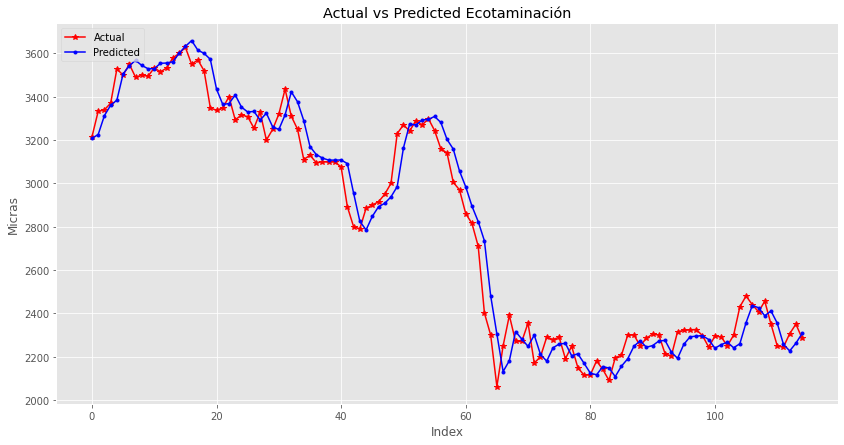

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(range(yEco_test.size), yEco_test, linestyle='-', marker='*', color='r')
plt.plot(range(ypred.size), ypred, linestyle='-', marker='.', color='b')
plt.legend(['Actual','Predicted'], loc=2)
plt.title('Actual vs Predicted Ecotaminación')
plt.ylabel('Micras')
plt.xlabel('Index')

Veamos entonces el comportamiento del modelo Eco los datos de prueba.

In [ ]:
2#Redes 2 capa
ypred_TRAIN=ts_model_full.predict(XEco_train_full)
ypred_TEST=ts_model_full.predict(XEco_test)

ypred_TRAIN=ypred_TRAIN[:,0]
ypred_TEST=ypred_TEST[:,0]
Redes=np.concatenate((ypred_TRAIN, ypred_TEST))

Real = np.concatenate((yEco_train_full,yEco_test))

d = {'Real': Real,  'Redes':Redes}
Todo=pd.DataFrame(data=d, index=Valores_Ecop.index[2:])
print(Todo)


2

4/4 [==============================] - 0s 3ms/step
              Real        Redes
Fecha                          
2018-01-04  2350.0  2220.096191
2018-01-05  2460.0  2301.051514
2018-01-09  2500.0  2408.167480
2018-01-10  2560.0  2470.332275
2018-01-11  2535.0  2527.715820
...            ...          ...
2022-09-01  2250.0  2355.021729
2022-09-02  2244.0  2249.362305
2022-09-05  2306.0  2219.779785
2022-09-06  2350.0  2262.932129
2022-09-07  2284.0  2312.038574

[1140 rows x 2 columns]


Ahora, observemos el comportamiento general.

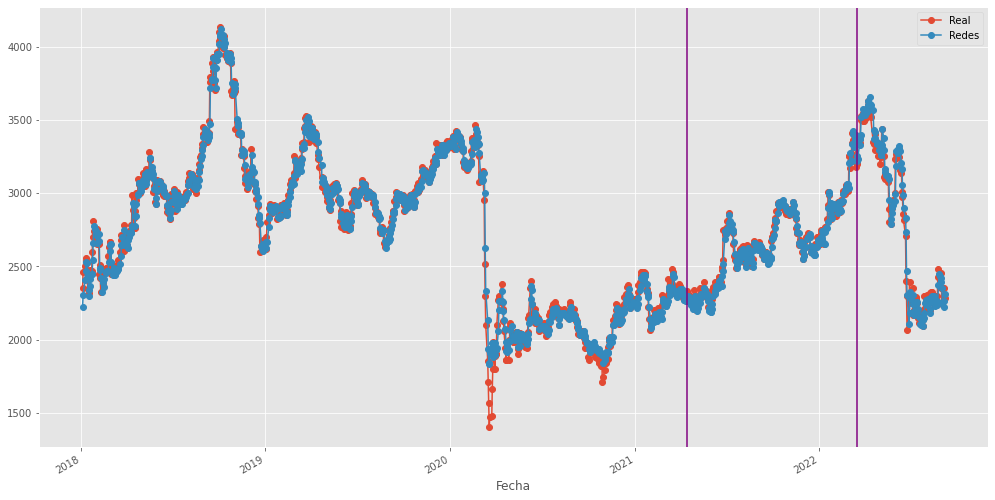

In [ ]:
ax = Todo.plot( marker="o", figsize=(17,9))
ax.axvline(x=Valores_Ecop.index[int(n*0.7)].date(),color='purple')
ax.axvline(x=Valores_Ecop.index[int(n*0.9)].date(),color='purple')

### Análisis Residuos

In [ ]:
difRedes=Todo['Redes']-Todo['Real']


<Figure size 1224x648 with 0 Axes>

Text(0.5, 1.0, 'Gráfica de errores de predicciòn para el modelo de redes MLP')

Text(0, 0.5, 'Error')

Text(0.5, 0, 'Index')

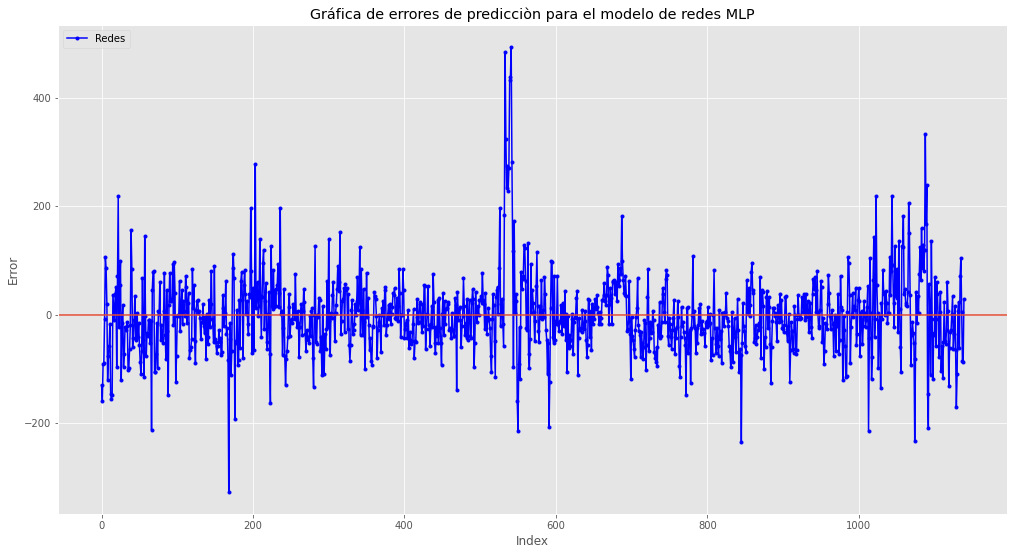

In [ ]:
plt.figure(figsize=(17, 9))
plt.plot(range(difRedes.size), difRedes, linestyle='-', marker='.', color='b')
plt.axhline(y=0, linestyle='-')
plt.legend(['Redes'], loc=2)
plt.title('Gráfica de errores de predicciòn para el modelo de redes MLP')
plt.ylabel('Error')
plt.xlabel('Index')

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

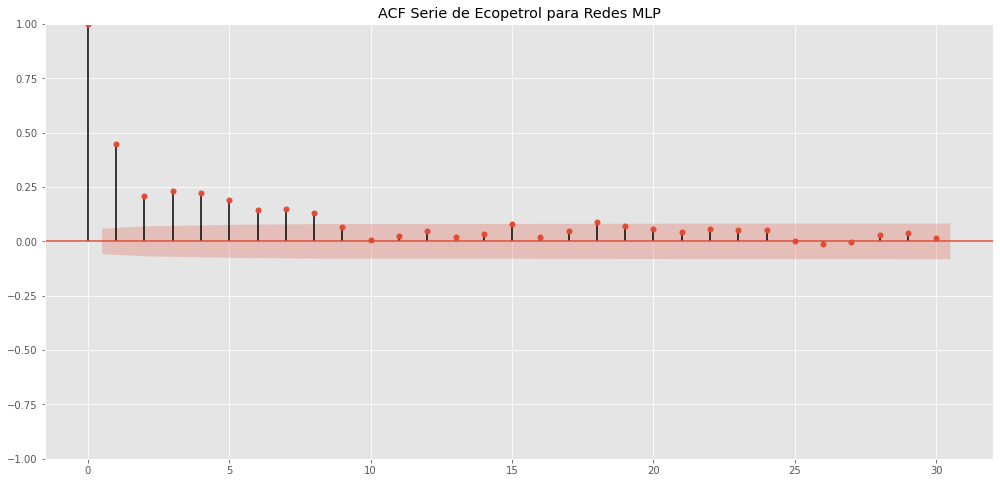

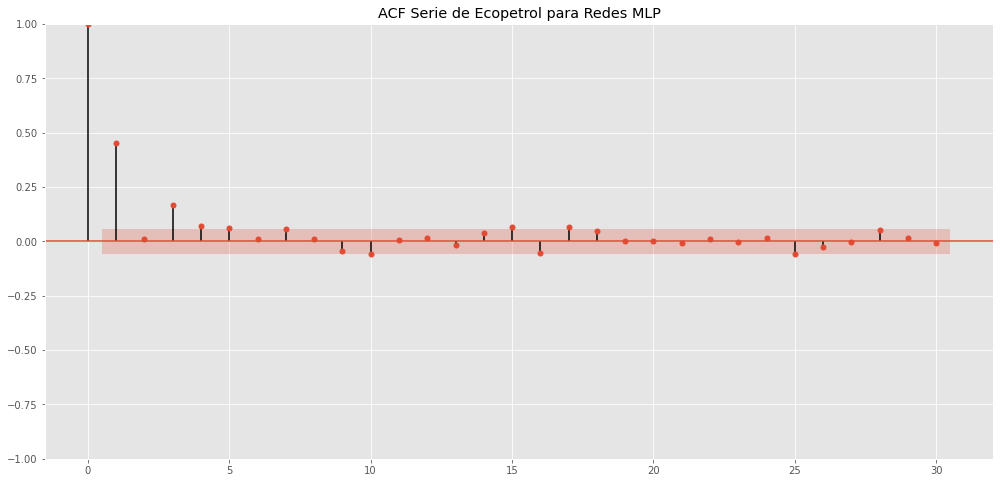

In [ ]:
plt.figure(figsize=(10, 6))
acf_red = plot_acf(difRedes,unbiased=False,lags=30,title='ACF Serie de Ecopetrol para Redes MLP')
plt.show(acf_red)
pacf_red = plot_pacf(difRedes,lags=30,title='ACF Serie de Ecopetrol para Redes MLP')
plt.show(pacf_red)

### ECM

In [ ]:
MseRED=np.dot(difRedes[int(n*0.9):],difRedes[int(n*0.9):])/len(difRedes[int(n*0.9):])

print('\n Mse para Redes:')
np.sqrt(MseRED)


 Mse para Redes:


92.46987403797988

## LSTM

### Identificación del modelo autorregresivo usando la autocorrelación parcial
Por medio de la autocorrelación parcial se identificará el número de retardos, y la longitud de la secuencia que se necesitaran para la red recurrente.

In [ ]:
pacf = sm.tsa.stattools.pacf(Valores_Ecop['Apertura'], nlags=30)
T = len(Valores_Ecop['Apertura'])

sig_test = lambda tau_h: np.abs(tau_h) > 2.58/np.sqrt(T)
for i in range(len(pacf)):
    if sig_test(pacf[i]) == False:
        n_steps = i - 1
        print('n_steps set to', n_steps)
        break

n_steps set to 2


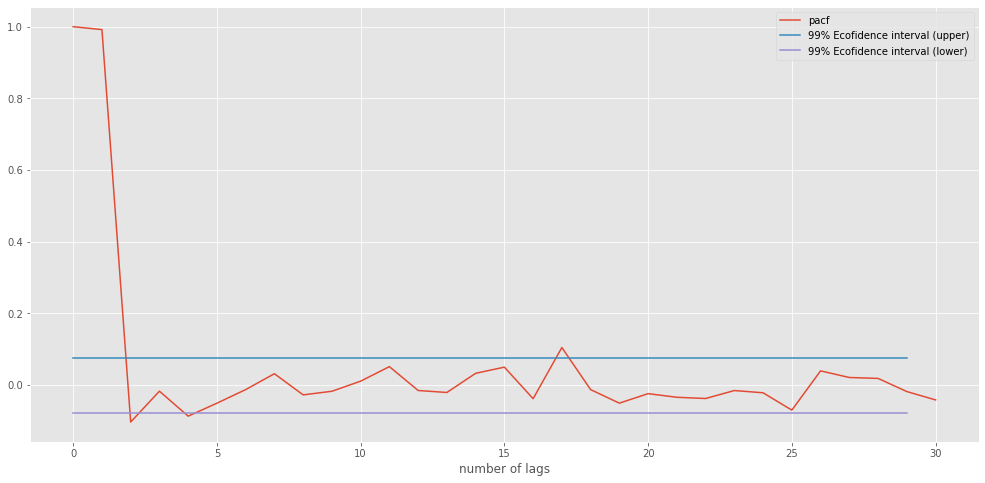

In [ ]:
plt.plot(pacf, label='pacf')
plt.plot([2.58/np.sqrt(T)]*30, label='99% Ecofidence interval (upper)')
plt.plot([-2.58/np.sqrt(T)]*30, label='99% Ecofidence interval (lower)')
plt.xlabel('number of lags')
plt.legend();

In [ ]:
Eco_train = Valores_Ecop['Apertura'].iloc[:(int(n*0.9)-n_steps)]
Eco_test = Valores_Ecop['Apertura'].iloc[(int(n*0.9)-n_steps):]
print(len(Eco_test),
      len(Eco_train.index) )

117 1025


### **Normalización**

In [ ]:
mu = float(Eco_train.mean())
sigma = float(Eco_train.std())

stdize_input = lambda x: (x - mu) / sigma

Eco_train = Eco_train.apply(stdize_input)
Eco_test = Eco_test.apply(stdize_input)

###**Separación datos de entrenamiento y validación para predecir los datos un paso adelante**

In [ ]:
n_steps_ahead = 1
def get_lagged_features(df, n_steps, n_steps_ahead):
    """
    df: pandas DataFrame of time series to be lagged
    n_steps: number of lags, i.e. sequence length
    n_steps_ahead: forecasting horizon
    """
    lag_list = []

    for lag in range(n_steps + n_steps_ahead - 1, n_steps_ahead - 1, -1):
        lag_list.append(df.shift(lag))
    lag_array = np.dstack([i[n_steps+n_steps_ahead-1:] for i in lag_list])
    # We swap the last two dimensions so each slice along the first dimension
    # is the same shape as the corresponding segment of the input time series
    lag_array = np.swapaxes(lag_array, 1, -1)
    return lag_array

In [ ]:
x_train = get_lagged_features(Eco_train, n_steps, n_steps_ahead)
y_train =  Eco_train.values[n_steps + n_steps_ahead - 1:]
y_train_timestamps = Eco_train.index[n_steps + n_steps_ahead - 1:]

x_test = get_lagged_features(Eco_test, n_steps, n_steps_ahead)
y_test =  Eco_test.values[n_steps + n_steps_ahead - 1:]
y_test_timestamps = Eco_test.index[n_steps + n_steps_ahead - 1:]

x_train, x_test = x_train.T, x_test.T
print([tensor.shape for tensor in (x_train, y_train, x_test, y_test)])

[(1023, 2, 1), (1023,), (115, 2, 1), (115,)]


###**Definición de modelos LSTM**

In [ ]:
def LSTM_(n_units = 16, l1_reg=0.0, seed=0):
  model = keras.models.Sequential()
  model.add(keras.layers.LSTM(n_units, activation='tanh', kernel_initializer=keras.initializers.glorot_uniform(seed), bias_initializer=keras.initializers.glorot_uniform(seed), recurrent_initializer=keras.initializers.orthogonal(seed), kernel_regularizer=keras.regularizers.l1(l1_reg), input_shape=(x_train.shape[1], x_train.shape[-1]), unroll=True))
  model.add(keras.layers.Dense(1, kernel_initializer=keras.initializers.glorot_uniform(seed), bias_initializer=keras.initializers.glorot_uniform(seed), kernel_regularizer=keras.regularizers.l1(l1_reg)))
  model.compile(loss='mean_squared_error', optimizer='adam')
  return model

Como la serie es de pocos datos vamos a utilizar un tamaño de 100 y un número de épocas de 10.

In [ ]:
import tensorflow.keras as keras
max_epochs = 50
batch_size = 30
es = keras.callbacks.EarlyStopping(monitor='loss', mode='min', verbose=1, patience=50, min_delta=1e-7, restore_best_weights=True)
params = {
    'lstm': {
        'model': None, 'function': LSTM_,'l1_reg': 0.0, 'H': 32,
        'color':'red', 'label': 'LSTM'}
}

###**Validación cruzada**
La validación cruzada es un téctina que sirve para evaluar varios modelos de redes neuronales mediante el entrenamiento de un subEcojunto de datos de la serie y luego lo evalua en otro subEcojunto de datos el cual es complementario al utilizado para el entrenamiento.
Para saber que hiperparámetros utilizar en el modelelamiento definimos tres potencias de 2 más utilizadas en el modelamiento de redes neuronales (128, 256, 512), 4 valores para la regresión (0, 0.001, 0.01, 0.1).

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, TimeSeriesSplit, GridSearchCV
import tensorflow as tf

In [ ]:
do_training = True
cross_val = True # WARNING: Changing this to True will take many hours to run

if do_training and cross_val:
    n_units = [128, 256, 512]
    l1_reg = [0, 0.001, 0.01, 0.1]

    # A dictionary Ecotaining a list of values to be iterated through
    # for each parameter of the model included in the search
    param_grid = {'n_units': n_units, 'l1_reg': l1_reg}

    # In the kth split, TimeSeriesSplit returns first k folds
    # as training set and the (k+1)th fold as test set.
    tscv = TimeSeriesSplit(n_splits = 5)

    # A grid search is performed for each of the models, and the parameter set which
    # performs best over all the cross-validation splits is saved in the `params` dictionary
    for key in params.keys():
        print('Performing cross-validation. Model:', key)
        model = keras.wrappers.scikit_learn.KerasRegressor(build_fn=params[key]['function'], epochs=max_epochs,
                               batch_size=batch_size, verbose=2)
        #from scikeras.wrappers import KerasClassifier, KerasRegressor
        grid = GridSearchCV(estimator=model, param_grid=param_grid,
                            cv=tscv, n_jobs=1, verbose=2)
        grid_result = grid.fit(x_train, y_train, callbacks=[es])
        print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

        means = grid_result.cv_results_['mean_test_score']
        stds = grid_result.cv_results_['std_test_score']
        params_ = grid_result.cv_results_['params']
        for mean, stdev, param_ in zip(means, stds, params_):
            print("%f (%f) with %r" % (mean, stdev, param_))

        params[key]['H'] = grid_result.best_params_['n_units']
        params[key]['l1_reg']= grid_result.best_params_['l1_reg']

Se han truncado las últimas 5000 líneas del flujo de salida.
18/18 - 0s - loss: 0.0231 - 415ms/epoch - 23ms/step
Epoch 6/50
18/18 - 0s - loss: 0.0221 - 399ms/epoch - 22ms/step
Epoch 7/50
18/18 - 0s - loss: 0.0217 - 418ms/epoch - 23ms/step
Epoch 8/50
18/18 - 0s - loss: 0.0216 - 412ms/epoch - 23ms/step
Epoch 9/50
18/18 - 0s - loss: 0.0230 - 411ms/epoch - 23ms/step
Epoch 10/50
18/18 - 0s - loss: 0.0215 - 425ms/epoch - 24ms/step
Epoch 11/50
18/18 - 0s - loss: 0.0216 - 415ms/epoch - 23ms/step
Epoch 12/50
18/18 - 0s - loss: 0.0220 - 419ms/epoch - 23ms/step
Epoch 13/50
18/18 - 0s - loss: 0.0220 - 420ms/epoch - 23ms/step
Epoch 14/50
18/18 - 0s - loss: 0.0225 - 446ms/epoch - 25ms/step
Epoch 15/50
18/18 - 0s - loss: 0.0212 - 316ms/epoch - 18ms/step
Epoch 16/50
18/18 - 0s - loss: 0.0209 - 258ms/epoch - 14ms/step
Epoch 17/50
18/18 - 0s - loss: 0.0202 - 256ms/epoch - 14ms/step
Epoch 18/50
18/18 - 0s - loss: 0.0196 - 262ms/epoch - 15ms/step
Epoch 19/50
18/18 - 0s - loss: 0.0211 - 260ms/epoch - 14ms/

###**Entrenamiento del modelo por validación cruzada**

In [ ]:
if do_training is True:
    for key in params.keys():
        tf.random.set_seed(0)
        print('Training', key, 'model')
        model = params[key]['function'](params[key]['H'], params[key]['l1_reg'])
        model.fit(x_train, y_train, epochs=max_epochs,
                  batch_size=batch_size, callbacks=[es], shuffle=False)
        params[key]['model'] = model

Training lstm model
Epoch 1/50
35/35 [==============================] - 1s 17ms/step - loss: 0.5329
Epoch 2/50
35/35 [==============================] - 1s 17ms/step - loss: 0.0909
Epoch 3/50
35/35 [==============================] - 1s 17ms/step - loss: 0.0837
Epoch 4/50
35/35 [==============================] - 1s 17ms/step - loss: 0.0436
Epoch 5/50
35/35 [==============================] - 1s 16ms/step - loss: 0.0392
Epoch 6/50
35/35 [==============================] - 1s 17ms/step - loss: 0.0288
Epoch 7/50
35/35 [==============================] - 1s 16ms/step - loss: 0.0294
Epoch 8/50
35/35 [==============================] - 1s 17ms/step - loss: 0.0261
Epoch 9/50
35/35 [==============================] - 1s 17ms/step - loss: 0.0269
Epoch 10/50
35/35 [==============================] - 1s 18ms/step - loss: 0.0264
Epoch 11/50
35/35 [==============================] - 1s 27ms/step - loss: 0.0266
Epoch 12/50
35/35 [==============================] - 1s 27ms/step - loss: 0.0266
Epoch 13/50
35/35

In [ ]:
for key in params.keys():
    params[key]['model'].save('Ecotaminación-SAVED-' + key + '.hdf5', overwrite=True)

###**Predicción**

In [ ]:
if do_training is False:
     for key in params.keys():
        params[key]['model']=keras.models.load_model('Ecopetrol-SAVED-' + key + '.hdf5')

In [ ]:
for key in params.keys():
    model = params[key]['model']
    model.summary()

    params[key]['pred_train'] = model.predict(x_train, verbose=1)
    params[key]['MSE_train'] = mean_squared_error(y_train, params[key]['pred_train'])

    params[key]['pred_test'] = model.predict(x_test, verbose=1)
    params[key]['MSE_test'] = mean_squared_error(y_test, params[key]['pred_test'])

Model: "sequential_206"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_206 (LSTM)             (None, 512)               1052672   
                                                                 
 dense_557 (Dense)           (None, 1)                 513       
                                                                 
Total params: 1,053,185
Trainable params: 1,053,185
Non-trainable params: 0
_________________________________________________________________
4/4 [==============================] - 0s 7ms/step


###**Rendimiento de los modelos**

In [ ]:
PredRedEcoTrain=params['lstm']['pred_train']
PredRedEcoTest=params['lstm']['pred_test']

In [ ]:
PredRedEcoTrainST=PredRedEcoTrain*sigma +mu
PredRedEcoTestST=PredRedEcoTest*sigma +mu

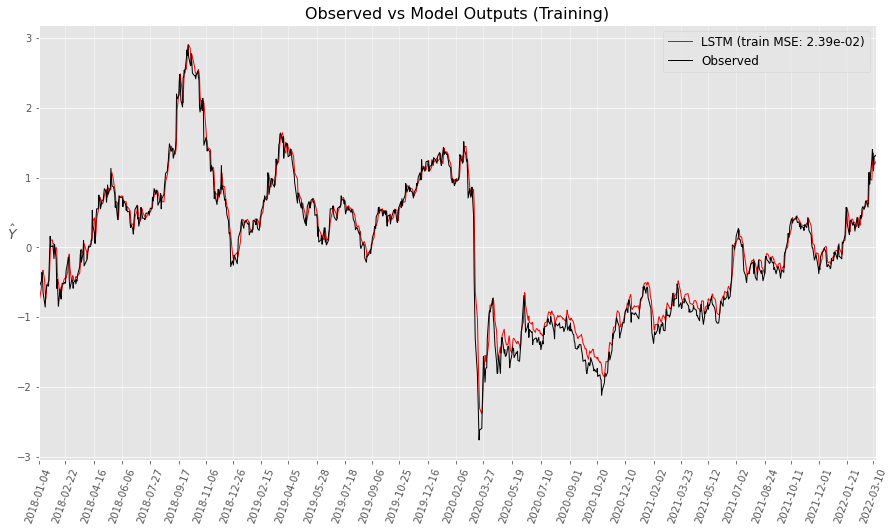

In [ ]:
from datetime import datetime
max_pts = 10**4
compare = params.keys() # e.g. ['rnn', 'alpharnn'] or ['lstm']
l, u = (None, None) # lower and upper indices of range to plot
ds = max(1, len(y_train[l:u])//max_pts) # Downsampling ratio for under `max_pts`
                                        # per series.  Set `None` to disable.

fig = plt.figure(figsize=(15,8))
x_vals = y_train_timestamps[l:u:ds]
for key in compare:
    y_vals = params[key]['pred_train'][l:u:ds]
    label = params[key]['label'] + ' (train MSE: %.2e)' % params[key]['MSE_train']
    plt.plot(x_vals, y_vals, c=params[key]['color'], label=label, lw=1)
plt.plot(x_vals, y_train[l:u:ds], c="black", label="Observed", lw=1)
start, end = x_vals.min(), x_vals.max()
x_vals=x_vals[::max(1,len(x_vals)//30)]
for t in x_vals: plt.axvline(x=t, c='gray', linewidth=0.5, zorder=0)
plt.xticks(x_vals, rotation=70)
plt.xlim(start, end)
plt.ylabel('$\hat{Y}$', rotation=0, fontsize=14)
plt.legend(loc="best", fontsize=12)
plt.title('Observed vs Model Outputs (Training)', fontsize=16);

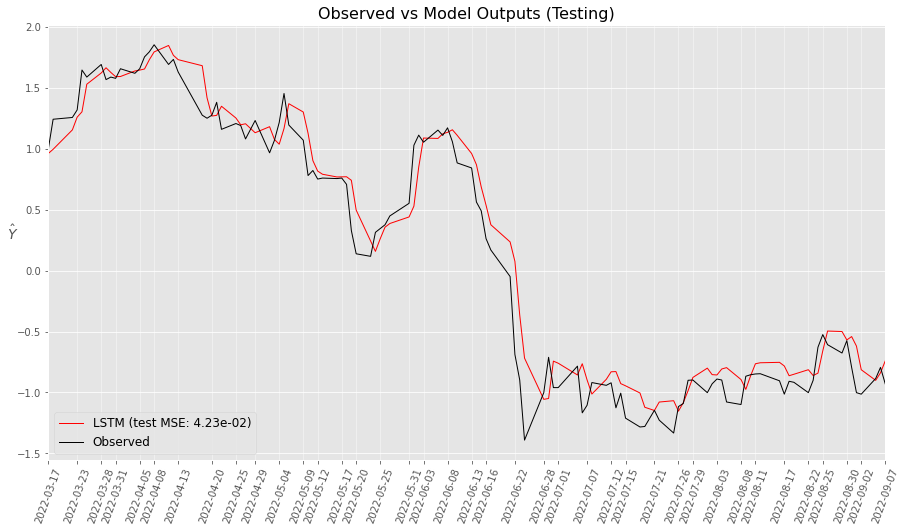

In [ ]:
compare = params.keys() # e.g. ['rnn', 'alpharnn'] or ['lstm']
l, u = (None, None) # lower and upper indices of range to plot
ds = max(1, len(y_train[l:u])//max_pts) # Downsampling ratio for under `max_pts`
                                        # per series.  Set `None` to disable.
fig = plt.figure(figsize=(15,8))
x_vals = y_test_timestamps[l:u:ds]
for key in compare:
    y_vals = params[key]['pred_test'][l:u:ds]
    label = params[key]['label'] + ' (test MSE: %.2e)' % params[key]['MSE_test']
    plt.plot(x_vals, y_vals, c=params[key]['color'], label=label, lw=1)
plt.plot(x_vals, y_test[l:u:ds], c="black", label="Observed", lw=1)
start, end = x_vals.min(), x_vals.max()
x_vals=x_vals[::max(1,len(x_vals)//30)]
for t in x_vals: plt.axvline(x=t, c='gray', linewidth=0.5, zorder=0)
plt.xticks(x_vals, rotation=70)
plt.xlim(start, end)
plt.ylabel('$\hat{Y}$', rotation=0, fontsize=14)
plt.legend(loc="best", fontsize=12)
plt.title('Observed vs Model Outputs (Testing)', fontsize=16);

In [ ]:
PredRedEcoTrainST2=PredRedEcoTrainST[:,0]
PredRedEcoTestST2=PredRedEcoTestST[:,0]

PredRedesEco=np.concatenate((PredRedEcoTrainST2, PredRedEcoTestST2))

### Análisis Residuos

In [ ]:
2#Redes 2 capa
Real = np.concatenate((yEco_train_full,yEco_test[2:]))

d2 = {'Real': Real,  'Redes LSTM':PredRedesEco}
Todo2=pd.DataFrame(data=d2)
print(Todo2)

len(Real)

2

        Real   Redes LSTM
0     2350.0  2292.449707
1     2460.0  2361.889404
2     2500.0  2451.697021
3     2560.0  2516.608154
4     2535.0  2564.787842
...      ...          ...
1133  2250.0  2434.507080
1134  2244.0  2340.698975
1135  2306.0  2298.688721
1136  2350.0  2328.594971
1137  2284.0  2376.135742

[1138 rows x 2 columns]


1138

In [ ]:
difRedLSTM=Todo2['Redes LSTM']-Todo2['Real']


<Figure size 1224x648 with 0 Axes>

Text(0.5, 1.0, 'Gráfica de errores de predicciòn para el modelo de redes MLP')

Text(0, 0.5, 'Error')

Text(0.5, 0, 'Index')

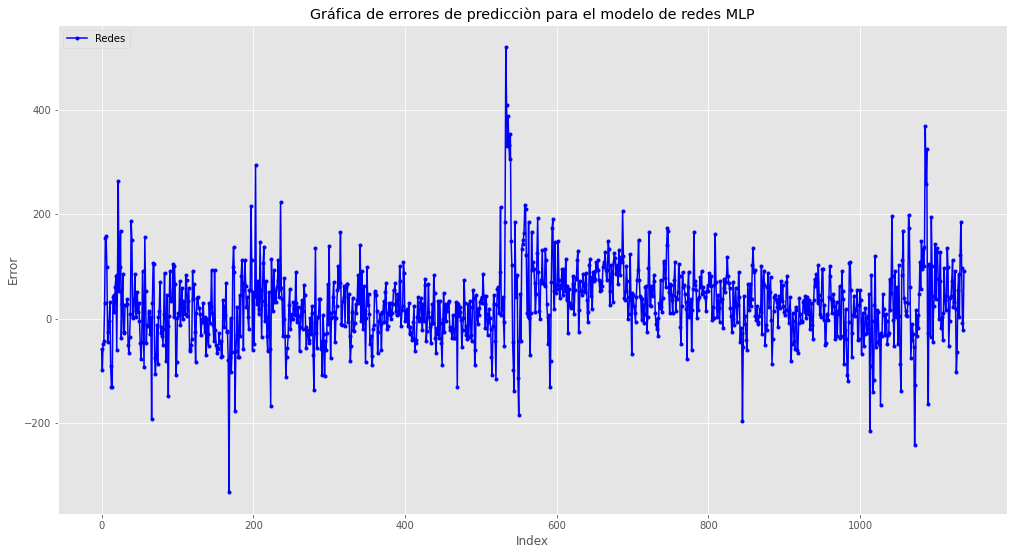

In [ ]:
plt.figure(figsize=(17, 9))
plt.plot(range(difRedLSTM.size), difRedLSTM, linestyle='-', marker='.', color='b')
plt.legend(['Redes'], loc=2)
plt.title('Gráfica de errores de predicciòn para el modelo de redes MLP')
plt.ylabel('Error')
plt.xlabel('Index')

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

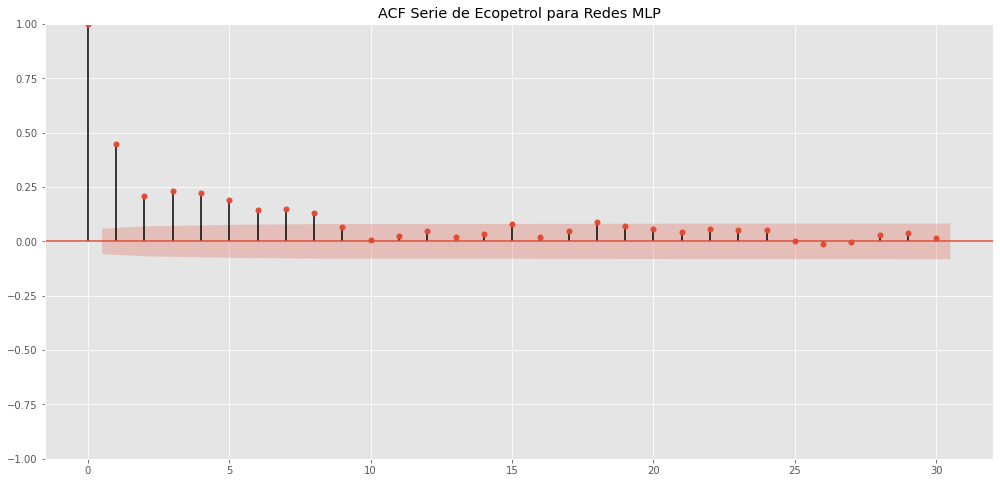

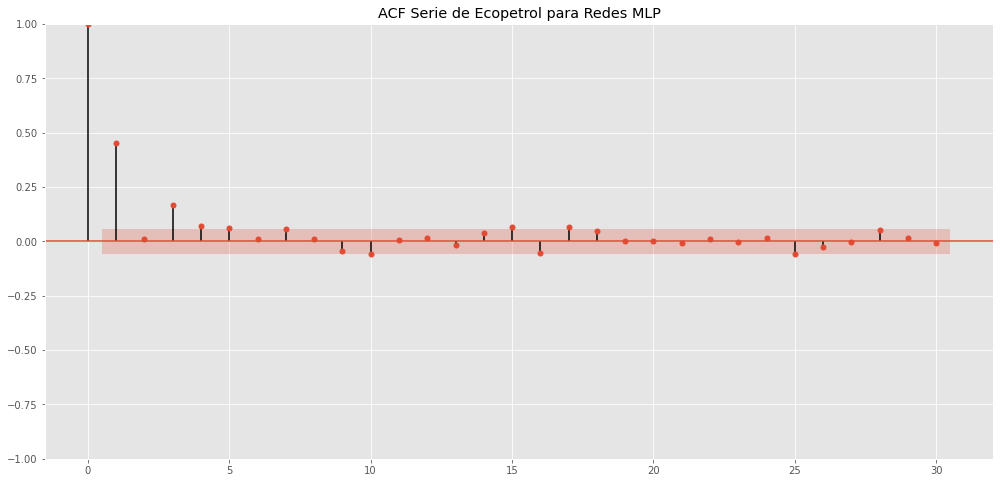

In [ ]:
plt.figure(figsize=(10, 6))
acf_red = plot_acf(difRedes,unbiased=False,lags=30,title='ACF Serie de Ecopetrol para Redes MLP')
plt.show(acf_red)
pacf_red = plot_pacf(difRedes,lags=30,title='PACF Serie de Ecopetrol para Redes MLP')
plt.show(pacf_red)

### ECM

In [ ]:
MseRED=np.dot(difRedLSTM[1023:],difRedLSTM[1023:])/len(difRedLSTM[1023:])
#len(difRedLSTM[1023:])
print('\n Mse para Redes:')
np.sqrt(MseRED)


 Mse para Redes:


98.61739703250817

## Árboles

In [ ]:
import pandas as pd
from pandas import read_csv
from matplotlib import pyplot
import numpy as np
import scipy as sp
import matplotlib.pylab as plt
import numpy as np
import sklearn

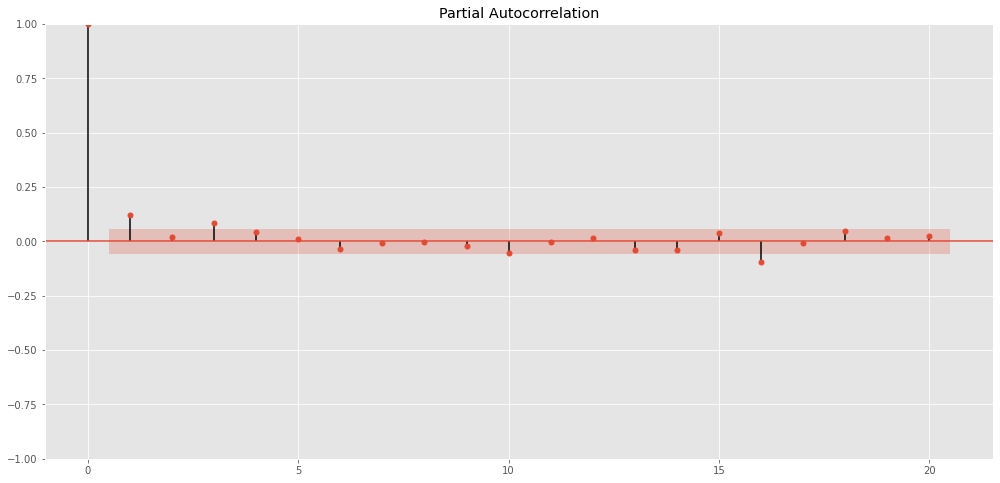

In [ ]:
pacf_diff=plot_pacf(diff, lags=20, method='ldbiased')

###Creación de variables rezagadas

In [ ]:
from pandas import DataFrame
df1 = DataFrame()

# incluir los retardos que van a explicar el tiempo t
for i in range(1,0,-1):
    df1['t-'+str(i)] = diff.shift(i)

# añadir el tiempo t
df1['t'] = diff.values

print(df1)

# eliminar los valores NA
df1_Eco = df1[1:]

print(df1_Eco)

                  t-1          t
Fecha                           
2018-01-03        NaN   7.478495
2018-01-04   7.478495   8.465461
2018-01-05   8.465461  11.504917
2018-01-09  11.504917   4.146396
2018-01-10   4.146396   6.183724
...               ...        ...
2022-09-01 -11.089206 -10.595263
2022-09-02 -10.595263  -0.640009
2022-09-05  -0.640009   6.589798
2022-09-06   6.589798   4.645474
2022-09-07   4.645474  -6.977838

[1141 rows x 2 columns]
                  t-1          t
Fecha                           
2018-01-04   7.478495   8.465461
2018-01-05   8.465461  11.504917
2018-01-09  11.504917   4.146396
2018-01-10   4.146396   6.183724
2018-01-11   6.183724  -2.571388
...               ...        ...
2022-09-01 -11.089206 -10.595263
2022-09-02 -10.595263  -0.640009
2022-09-05  -0.640009   6.589798
2022-09-06   6.589798   4.645474
2022-09-07   4.645474  -6.977838

[1140 rows x 2 columns]


### Dividir los datos

In [ ]:
# Split data

Ecosplit = df1_Eco.values
# split into lagged variables and original time series
X_Eco = Ecosplit[:, 0:-1]  # slice all rows and start with column 0 and go up to but not including the last column
y_Eco = Ecosplit[:,-1]  # slice all rows and last column, essentially separating out 't' column

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# 1142 tamaño serie original
# 1141 tamaño serie diferenciada
# 1138 tamaño serie sin 3 primeros retardos
# 798 tamaño entrenamiento ---------------------- serie original
# 229 tamaño validación
# 114 tamaño prueba

train_size = 798
train_target = y_Eco[0:train_size]
valid_target = y_Eco[train_size:1026]
test_target = y_Eco[1026:len(y_Eco)]

# regresoras
train_feature = X_Eco[0:train_size]
valid_feature = X_Eco[train_size:1026]
test_feature = X_Eco[1026:len(y_Eco)]

#scaler=MinMaxScaler()
#train_feature=scaler.fit_transform(train_feature)
#valid_feature=scaler.transform(valid_feature)
#test_feature=scaler.transform(test_feature)

print('Observaciones respuesta: %d' % (len(y_Eco)))
print('Tamaño respuestas de entrenamiento: %d' % (len(train_target)))
print('Tamaño respuestas de validación: %d' % (len(valid_target)))
print('Tamaño respuestas de prueba: %d' % (len(test_target)))

print('Observaciones covariables: %d' % (len(X_Eco)))
print('Tamaño covariables de entrenamiento: %d' % (len(train_feature)))
print('Tamaño covariables de validación: %d' % (len(valid_feature)))
print('Tamaño covariables de prueba: %d' % (len(test_feature)))

Observaciones respuesta: 1140
Tamaño respuestas de entrenamiento: 798
Tamaño respuestas de validación: 228
Tamaño respuestas de prueba: 114
Observaciones covariables: 1140
Tamaño covariables de entrenamiento: 798
Tamaño covariables de validación: 228
Tamaño covariables de prueba: 114


### Decisión profundidad del árbol

In [ ]:
# Decision Tree Regresion Model
from sklearn.tree import DecisionTreeRegressor

# Find the best Max Depth

# Loop through a few different max depths and check the performance
# Try different max depths. We want to optimize our ML models to make the best predictions possible.
# For regular decision trees, max_depth, which is a hyperparameter, limits the number of splits in a tree.
# You can find the best value of max_depth based on the R-squared score of the model on the test set.


for d in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]:
    # Create the tree and fit it
    decision_tree_Eco = DecisionTreeRegressor(max_depth=d)
    decision_tree_Eco.fit(train_feature, train_target)

    # Print out the scores on train and test
    print('max_depth=', str(d))
    print("Coeficiente R2 sobre el Ecojunto de entrenamiento:",decision_tree_Eco.score(train_feature, train_target))
    print("Coeficiente R2 sobre el Ecojunto de validación:",decision_tree_Eco.score(test_feature, test_target))  # You want the test score to be positive and high
    print("el ECM sobre el Ecojunto de prueba es:",sklearn.metrics.mean_squared_error(decision_tree_Eco.predict(valid_feature),valid_target, squared=False))

DecisionTreeRegressor(max_depth=2)

max_depth= 2
Coeficiente R2 sobre el Ecojunto de entrenamiento: 0.06005328423145462
Coeficiente R2 sobre el Ecojunto de validación: -0.07403421508262298
el ECM sobre el Ecojunto de prueba es: 4.948235339634806


DecisionTreeRegressor(max_depth=3)

max_depth= 3
Coeficiente R2 sobre el Ecojunto de entrenamiento: 0.09728576294609803
Coeficiente R2 sobre el Ecojunto de validación: -0.09186927529758515
el ECM sobre el Ecojunto de prueba es: 5.115932587252082


DecisionTreeRegressor(max_depth=4)

max_depth= 4
Coeficiente R2 sobre el Ecojunto de entrenamiento: 0.10839606178069583
Coeficiente R2 sobre el Ecojunto de validación: -0.17142097592485595
el ECM sobre el Ecojunto de prueba es: 5.085455255751069


DecisionTreeRegressor(max_depth=5)

max_depth= 5
Coeficiente R2 sobre el Ecojunto de entrenamiento: 0.1223145012384973
Coeficiente R2 sobre el Ecojunto de validación: -0.2941767701827751
el ECM sobre el Ecojunto de prueba es: 5.084169919257793


DecisionTreeRegressor(max_depth=6)

max_depth= 6
Coeficiente R2 sobre el Ecojunto de entrenamiento: 0.13186660695129715
Coeficiente R2 sobre el Ecojunto de validación: -0.24395763538574133
el ECM sobre el Ecojunto de prueba es: 5.097544664725034


DecisionTreeRegressor(max_depth=7)

max_depth= 7
Coeficiente R2 sobre el Ecojunto de entrenamiento: 0.15881123935299146
Coeficiente R2 sobre el Ecojunto de validación: -0.25951939848279615
el ECM sobre el Ecojunto de prueba es: 5.13588356702958


DecisionTreeRegressor(max_depth=8)

max_depth= 8
Coeficiente R2 sobre el Ecojunto de entrenamiento: 0.20931676566715784
Coeficiente R2 sobre el Ecojunto de validación: -0.5169528340717222
el ECM sobre el Ecojunto de prueba es: 5.094131545805058


DecisionTreeRegressor(max_depth=9)

max_depth= 9
Coeficiente R2 sobre el Ecojunto de entrenamiento: 0.23534408807703555
Coeficiente R2 sobre el Ecojunto de validación: -0.5709391959059984
el ECM sobre el Ecojunto de prueba es: 5.143869279919774


DecisionTreeRegressor(max_depth=10)

max_depth= 10
Coeficiente R2 sobre el Ecojunto de entrenamiento: 0.26966846762660246
Coeficiente R2 sobre el Ecojunto de validación: -0.5804857453839054
el ECM sobre el Ecojunto de prueba es: 5.535962947550729


DecisionTreeRegressor(max_depth=11)

max_depth= 11
Coeficiente R2 sobre el Ecojunto de entrenamiento: 0.30188545544395107
Coeficiente R2 sobre el Ecojunto de validación: -0.566317021524877
el ECM sobre el Ecojunto de prueba es: 5.582199692823598


#### Crear covariable intervención

In [ ]:
for i in range(0,len(XEco_train)):
  if i<=(535-retar):
    XEco_train[i,2]=0
  else:
    XEco_train[i,2]=1

for i in range(0,len(XEco_train_full)):
  if i<=(535-retar):
    XEco_train_full[i,2]=0
  else:
    XEco_train_full[i,2]=1

for i in range(0,len(XEco_val)):
  XEco_val[i,2]=1

for i in range(0,len(XEco_test)):
  XEco_test[i,2]=1
